# Notebook on Kaggle Titanic competition

--------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import training set as 'Train_Titanic'

In [2]:
Train_Titanic = pd.read_csv('train set Titanic.csv')
Train_Titanic.shape

(891, 12)

In [3]:
Train_Titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21075.0000,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
Train_Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,4026.270117
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,22153.876204
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,8.050000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,19.500000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,56.929200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,262375.000000


## Import test set as 'Test_Titanic'

In [5]:
Test_Titanic = pd.read_csv('test set Titanic.csv')
Test_Titanic.shape

(418, 11)

In [6]:
Test_Titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


-------------------------------------------

### 1. 'Train_Titanic' data pre-processing

#### A. Dealing with NaN values in training set

#### > Detect the columns with NaN values

In [7]:
Train_Titanic.loc[:, Train_Titanic.isna().any()]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
5,NaN,NaN,Q
6,54.0,E46,S
7,2.0,NaN,S
8,27.0,NaN,S
9,14.0,NaN,C


In [8]:
#another way to show NaN values for each column
Train_Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### > Dropping NaN values or Replacing NaN values in Age column by mean

In [9]:
nan_age = Train_Titanic[Train_Titanic['Age'].isnull()]
nan_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7225.0000,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7225.0000,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [10]:
nan_age.shape

(177, 12)

In [11]:
mean = round(Train_Titanic['Age'].mean(),2)
mean

29.7

In [12]:
#replace the 177 NaN values in Age column by mean
#Train_Titanic['Age'] = Train_Titanic['Age'].replace(np.nan, mean)

In [13]:
#drop the 177 rows with NaN values in Age column
Train_Titanic.dropna(subset = ['Age'], axis = 0, inplace = True)

#### > Replacing missing values in Embarked column by most frequent

In [14]:
#distribution of embarking port
df_Emb = pd.DataFrame(Train_Titanic['Embarked'].value_counts())
df_Emb

,Embarked
S,554
C,130
Q,28


In [15]:
nan_emb = Train_Titanic[Train_Titanic['Embarked'].isnull()]
nan_emb.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
nan_emb.shape

(2, 12)

In [17]:
#replace the 2 NaN values by the most frequent Embarking port, Southampton
Train_Titanic['Embarked'] = Train_Titanic['Embarked'].replace(np.nan, 'S')

In [18]:
#drop the 2 rows with a NaN value in Embarked column
#Train_Titanic.dropna(subset = ['Embarked'], axis = 0, inplace = True)

##### > working with the Cabin column

In [19]:
Decks_df = Train_Titanic[['Cabin']]
Decks_df.head(10)

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
6,E46
7,NaN
8,NaN
9,NaN
10,G6


In [20]:
Decks_df = Decks_df.dropna()

##### Nr of registered passengers on the different decks (as an code-example to extract rows based on partial values)

In [21]:
Decks_df_A = Decks_df[Decks_df.Cabin.str.contains('A')]
print('number of passengers that had a cabin on deck A:',Decks_df_A.shape[0])

number of passengers that had a cabin on deck A: 12


In [22]:
Decks_df_B = Decks_df[Decks_df.Cabin.str.contains('B')]
print('number of passengers with a cabin on deck B:',Decks_df_B.shape[0])

number of passengers with a cabin on deck B: 45


In [23]:
Decks_df_C = Decks_df[Decks_df.Cabin.str.contains('C')]
print('number of passengers with a cabin on deck C:',Decks_df_C.shape[0])

number of passengers with a cabin on deck C: 51


In [24]:
Decks_df_D = Decks_df[Decks_df.Cabin.str.contains('D')]
print('number of passengers with a cabin on deck D:',Decks_df_D.shape[0])

number of passengers with a cabin on deck D: 31


In [25]:
Decks_df_E = Decks_df[Decks_df.Cabin.str.contains('E')]
print('number of passengers with a cabin on deck E:',Decks_df_E.shape[0])

number of passengers with a cabin on deck E: 30


In [26]:
Decks_df_F = Decks_df[Decks_df.Cabin.str.contains('F')]
print('number of passengers with a cabin on deck F:',Decks_df_F.shape[0])

number of passengers with a cabin on deck F: 11


In [27]:
Decks_df_G = Decks_df[Decks_df.Cabin.str.contains('G')]
print('number of passengers with a cabin on deck G:',Decks_df_G.shape[0])

number of passengers with a cabin on deck G: 7


##### how many NaN values are in the Cabin column:

In [28]:
Train_Titanic['Cabin'].isnull().sum()

529

In [29]:
#687 out of 891 rows in Cabin column is a NaN value so I drop the entire column, plus some other unwanted columns
Train_Titanic = Train_Titanic.drop(['Cabin', 'Fare', 'Ticket','PassengerId'], axis = 1)
Train_Titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,C
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,S


In [30]:
#Check if any columns with NaN values are left
Train_Titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [31]:
Train_Titanic.shape

(714, 8)

In [32]:
Train_Titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

### 2. 'Test_Titanic' data pre-processing

In [33]:
Test_Titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
mean = round(Test_Titanic['Age'].mean(),2)
mean
# Test_Titanic.dropna(subset = ['Age'], axis = 0, inplace = True)

30.27

In [35]:
#replace the 86 NaN values in Age column by mean
Test_Titanic['Age'] = Test_Titanic['Age'].replace(np.nan, mean)

In [36]:
Test_Titanic = Test_Titanic.drop(['Cabin', 'Fare', 'Ticket'], axis = 1)
Test_Titanic.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,S


In [37]:
Test_Titanic.shape

(418, 8)

### Visualization - available colors and color-schemes matplotlib

In [38]:
#colors available in matplotlib
for name, hex in mpl.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


In [39]:
print(plt.style.available)

['seaborn-colorblind', 'seaborn-talk', 'seaborn', 'fast', 'seaborn-darkgrid', 'ggplot', 'classic', 'bmh', 'seaborn-ticks', 'seaborn-white', '_classic_test', 'seaborn-dark-palette', 'grayscale', 'seaborn-poster', 'tableau-colorblind10', 'seaborn-deep', 'seaborn-bright', 'seaborn-whitegrid', 'fivethirtyeight', 'seaborn-muted', 'dark_background', 'seaborn-notebook', 'seaborn-dark', 'seaborn-paper', 'seaborn-pastel', 'Solarize_Light2']


## Exploratory Data Analysis - Train_Titanic

#### Binning

In [41]:
#bins = np.linspace(min(Train_Titanic['Age']), max(Train_Titanic['Age']),8)

count, bin_edges = np.histogram(Train_Titanic['Age'])

xmin = bin_edges[0]-10
xmax = bin_edges[-1]+10

print(count)
print(bin_edges)

[ 54  46 177 169 118  70  45  24   9   2]
[ 0.42   8.378 16.336 24.294 32.252 40.21  48.168 56.126 64.084 72.042
 80.   ]


Text(0, 0.5, 'Number of passengers')

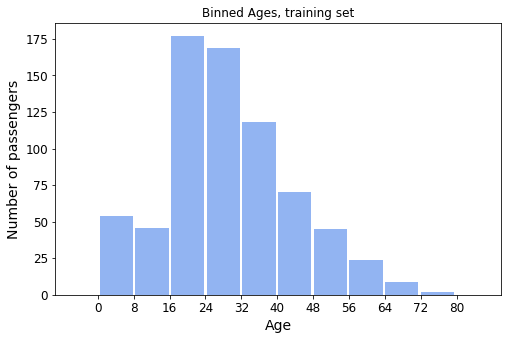

In [42]:
Train_Titanic['Age'].plot(kind='hist', figsize=(8,5), fontsize=12, xticks=(0,8,16,24,32,40,48,56,64,72,80), width=7.4,
                          alpha=0.7, color='cornflowerblue', xlim=(xmin, xmax))
plt.title('Binned Ages, training set')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)

In [43]:
df_sex = Train_Titanic.groupby('Sex', axis=0).sum()
df_sex

,Survived,Pclass,Age,SibSp,Parch
Sex,,,,,
female,197,539,7286.00,167,185
male,93,1058,13919.17,199,123


<function matplotlib.pyplot.show(*args, **kw)>

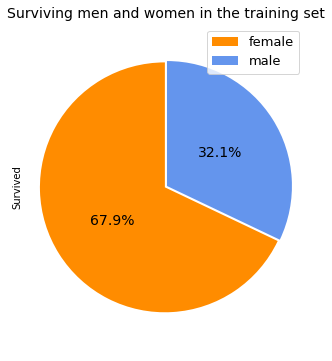

In [44]:
df_sex['Survived'].plot(kind='pie', figsize=(5,6), startangle=90, autopct='%1.1f%%', fontsize=14, explode=[0.01,0.01],
                        labels=None, pctdistance=0.5, colors=['darkorange','cornflowerblue'])
plt.title('Surviving men and women in the training set', fontsize=14)
plt.axis('equal')
plt.legend(labels=df_sex.index, loc='upper right', fontsize=13)
plt.show

In [45]:
df_Pclass = Train_Titanic.groupby('Pclass', axis=0).sum()
df_Pclass

,Survived,Age,SibSp,Parch
Pclass,,,,
1,122,7111.42,84,76
2,83,5168.83,74,70
3,85,8924.92,208,162


<function matplotlib.pyplot.show(*args, **kw)>

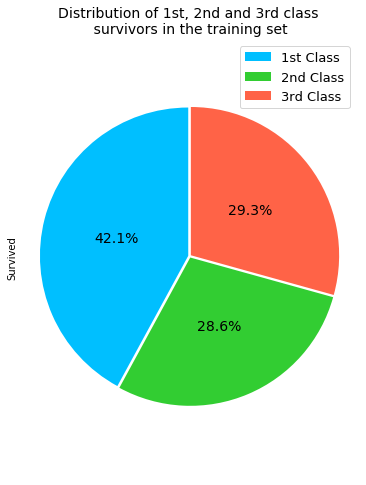

In [46]:
df_Pclass['Survived'].plot(kind='pie', figsize=(6,8), startangle=90, autopct='%1.1f%%',
                           fontsize=14, pctdistance=0.5, explode=[0.01,0.01,0.01], labels=None,
                          colors=['deepskyblue','limegreen','tomato'])
plt.title('Distribution of 1st, 2nd and 3rd class\n survivors in the training set', fontsize=14)
plt.axis('equal')
plt.legend(labels=['1st Class', '2nd Class', '3rd Class'], loc='upper right', fontsize=13)
plt.show

In [47]:
df_Embarked = Train_Titanic.groupby('Embarked', axis=0).sum()
df_Embarked

,Survived,Pclass,Age,SibSp,Parch
Embarked,,,,,
C,79,227,4005.92,55,54
Q,8,78,786.50,21,11
S,203,1292,16412.75,290,243


<function matplotlib.pyplot.show(*args, **kw)>

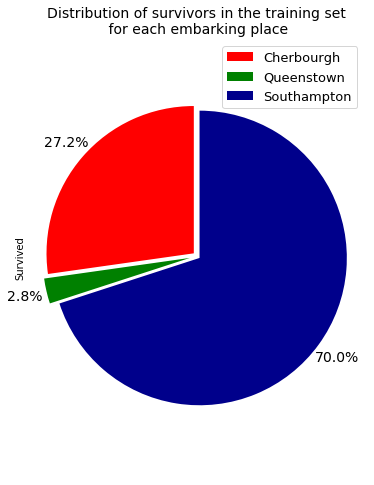

In [48]:
df_Embarked['Survived'].plot(kind='pie', figsize=(6,8), startangle=90, autopct='%1.1f%%',
                           fontsize=14, pctdistance=1.15, explode=[0.03,0.05,0.02], labels=None,
                          colors=['red','green','darkblue'])
plt.title('Distribution of survivors in the training set\n for each embarking place', fontsize=14)
plt.axis('equal')
plt.legend(labels=['Cherbourgh','Queenstown','Southampton'], loc='upper right', fontsize=13)
plt.show

### Survival Rates

#### Survival Male vs Female

##### Female

In [49]:
women_total = Train_Titanic.loc[Train_Titanic.Sex == 'female']
women_total.shape[0]
women_P_rate = round((women_total.shape[0]/Train_Titanic.shape[0]*100),2)
print(women_total.shape[0],'out of',Train_Titanic.shape[0],'passengers in the training set were female, this is',women_P_rate,'% of the passengers')

261 out of 714 passengers in the training set were female, this is 36.55 % of the passengers


In [50]:
F_S = Train_Titanic.loc[(Train_Titanic['Survived'] == True) & (Train_Titanic['Sex'] == 'female')]
F_D = Train_Titanic.loc[(Train_Titanic['Survived'] == False) & (Train_Titanic['Sex'] == 'female')]

print(F_S.shape[0],'women survived and',F_D.shape[0],'women died.')

197 women survived and 64 women died.


In [51]:
women = Train_Titanic.loc[Train_Titanic.Sex == 'female']["Survived"]
rate_women = round((sum(women)/len(women)*100),2)
rate_women_of_total = round((sum(women)/Train_Titanic.shape[0]*100),2)
print('so',rate_women,"% of the women survived")
print('this is',rate_women_of_total,'% of the total amount of passengers in the traning set')

so 75.48 % of the women survived
this is 27.59 % of the total amount of passengers in the traning set


##### Male

In [52]:
men_total = Train_Titanic.loc[Train_Titanic.Sex == 'male']
men_total.shape[0]
men_P_rate = round((men_total.shape[0]/Train_Titanic.shape[0]*100),2)
print(men_total.shape[0],'out of',Train_Titanic.shape[0],'passengers in the training set were male, this is',men_P_rate,'% of the passengers')

453 out of 714 passengers in the training set were male, this is 63.45 % of the passengers


In [53]:
M_S = Train_Titanic.loc[(Train_Titanic['Survived'] == True) & (Train_Titanic['Sex'] == 'male')]
M_D = Train_Titanic.loc[(Train_Titanic['Survived'] == False) & (Train_Titanic['Sex'] == 'male')]

print(M_S.shape[0],'men survived and',M_D.shape[0],'men died.')

93 men survived and 360 men died.


In [54]:
men = Train_Titanic.loc[Train_Titanic.Sex == 'male']["Survived"]
rate_men = round((sum(men)/len(men)*100),2)
rate_men_of_total = round((sum(men)/Train_Titanic.shape[0]*100),2)
print('so',rate_men,"% of the men survived")
print('this is',rate_men_of_total,'% of the total amount of passengers in the training set')

so 20.53 % of the men survived
this is 13.03 % of the total amount of passengers in the training set


#### Survival PClass and Gender

In [55]:
df_Pclass = pd.DataFrame(Train_Titanic['Pclass'].value_counts())
df_Pclass

,Pclass
3,355
1,186
2,173


##### Class 1

In [56]:
class1 = Train_Titanic.loc[Train_Titanic.Pclass == 1]['Survived']
rate_class1 = round((sum(class1)/len(class1)*100),2)

print(rate_class1,'% of training set passengers in Class 1 survived')

65.59 % of training set passengers in Class 1 survived


In [57]:
class1_F_S = Train_Titanic.loc[(Train_Titanic['Pclass'] == 1)&(Train_Titanic['Survived']== True)& (Train_Titanic['Sex'] == 'female')]
class1_F_D = Train_Titanic.loc[(Train_Titanic['Pclass'] == 1)&(Train_Titanic['Survived']== False)& (Train_Titanic['Sex'] == 'female')]
print(class1_F_S.shape[0],'women in Class 1 survived and', class1_F_D.shape[0], 'died.')

82 women in Class 1 survived and 3 died.


In [58]:
class1_M_S = Train_Titanic.loc[(Train_Titanic['Pclass'] == 1)&(Train_Titanic['Survived']== True)& (Train_Titanic['Sex'] == 'male')]
class1_M_D = Train_Titanic.loc[(Train_Titanic['Pclass'] == 1)&(Train_Titanic['Survived']== False)& (Train_Titanic['Sex'] == 'male')]
print(class1_M_S.shape[0],'men in Class 1 survived and', class1_M_D.shape[0], 'died.')

40 men in Class 1 survived and 61 died.


##### Class 2

In [59]:
class2 = Train_Titanic.loc[Train_Titanic.Pclass == 2]['Survived']
rate_class2 = round((sum(class2)/len(class2)*100),2)

print(rate_class2,'% of training set passengers in Class 2 survived')

47.98 % of training set passengers in Class 2 survived


In [60]:
class2_F_S = Train_Titanic.loc[(Train_Titanic['Pclass'] == 2)&(Train_Titanic['Survived']== True)& (Train_Titanic['Sex'] == 'female')]
class2_F_D = Train_Titanic.loc[(Train_Titanic['Pclass'] == 2)&(Train_Titanic['Survived']== False)& (Train_Titanic['Sex'] == 'female')]
print(class2_F_S.shape[0],'women in Class 2 survived and', class2_F_D.shape[0], 'died.')

68 women in Class 2 survived and 6 died.


In [61]:
class2_M_S = Train_Titanic.loc[(Train_Titanic['Pclass'] == 2)&(Train_Titanic['Survived']== True)& (Train_Titanic['Sex'] == 'male')]
class2_M_D = Train_Titanic.loc[(Train_Titanic['Pclass'] == 2)&(Train_Titanic['Survived']== False)& (Train_Titanic['Sex'] == 'male')]
print(class2_M_S.shape[0],'men in Class 2 survived and', class2_M_D.shape[0], 'died.')

15 men in Class 2 survived and 84 died.


##### Class 3

In [62]:
class3 = Train_Titanic.loc[Train_Titanic.Pclass == 3]['Survived']
rate_class3 = round((sum(class3)/len(class3)*100),2)

print(rate_class3,'% of training set passengers in Class 3 survived')

23.94 % of training set passengers in Class 3 survived


In [63]:
class3_F_S = Train_Titanic.loc[(Train_Titanic['Pclass'] == 3)&(Train_Titanic['Survived']== True)& (Train_Titanic['Sex'] == 'female')]
class3_F_D = Train_Titanic.loc[(Train_Titanic['Pclass'] == 3)&(Train_Titanic['Survived']== False)& (Train_Titanic['Sex'] == 'female')]
print(class3_F_S.shape[0],'women in Class 3 survived and', class3_F_D.shape[0], 'died.')

47 women in Class 3 survived and 55 died.


In [64]:
class3_M_S = Train_Titanic.loc[(Train_Titanic['Pclass'] == 3)&(Train_Titanic['Survived']== True)& (Train_Titanic['Sex'] == 'male')]
class3_M_D = Train_Titanic.loc[(Train_Titanic['Pclass'] == 3)&(Train_Titanic['Survived']== False)& (Train_Titanic['Sex'] == 'male')]
print(class3_M_S.shape[0],'men in Class 3 survived and', class3_M_D.shape[0], 'died.')

38 men in Class 3 survived and 215 died.


#### Survival Rate Embarking location S/Q/C

In [65]:
df_Emb

,Embarked
S,554
C,130
Q,28


In [66]:
EmbS = Train_Titanic.loc[Train_Titanic.Embarked == 'S']['Survived']
rate_EmbS = round((sum(EmbS)/len(EmbS)*100),2)
print(sum(EmbS))
print(rate_EmbS,'% of passengers that embarked in Southampton survived')

203
36.51 % of passengers that embarked in Southampton survived


In [67]:
EmbQ = Train_Titanic.loc[Train_Titanic.Embarked == 'Q']['Survived']
rate_EmbQ = round((sum(EmbQ)/len(EmbQ)*100),2)
print(sum(EmbQ))
print(rate_EmbQ,'% of passengers that embarked in Queenstown survived')

8
28.57 % of passengers that embarked in Queenstown survived


In [68]:
EmbC = Train_Titanic.loc[Train_Titanic.Embarked == 'C']['Survived']
rate_EmbC = round((sum(EmbC)/len(EmbC)*100),2)
print(sum(EmbC))
print(rate_EmbC,'% of passengers that embarked in Cherbourg survived')

79
60.77 % of passengers that embarked in Cherbourg survived


#### Survival Ages and Gender

###### Age 0-10

In [69]:
age0_10_total = Train_Titanic.loc[(Train_Titanic['Age'] >= 0)&(Train_Titanic['Age'] <= 10)]
age0_10_survived = Train_Titanic.loc[(Train_Titanic['Age'] >= 0)&(Train_Titanic['Age'] <= 10)&(Train_Titanic['Survived']== True)]

age0_10_rate = round((age0_10_survived.shape[0]/age0_10_total.shape[0]*100),2)

print(age0_10_survived.shape[0],'out of',age0_10_total.shape[0],'training set passengers up to 10 years of age survived')
print('This is',age0_10_rate,'%')

38 out of 64 training set passengers up to 10 years of age survived
This is 59.38 %


In [70]:
age0_10_total_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 0)&(Train_Titanic['Age'] <= 10)&(Train_Titanic['Sex']=='female')]
age0_10_survived_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 0)&(Train_Titanic['Age'] <= 10)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='female')]

age0_10_total_men = Train_Titanic.loc[(Train_Titanic['Age'] >= 0)&(Train_Titanic['Age'] <= 10)&(Train_Titanic['Sex']=='male')]
age0_10_survived_men = Train_Titanic.loc[(Train_Titanic['Age'] >= 0)&(Train_Titanic['Age'] <= 10)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='male')]


print(age0_10_survived_women.shape[0],'out of',age0_10_total_women.shape[0],'female passengers up to 10 years of age survived')
print(age0_10_survived_men.shape[0],'out of',age0_10_total_men.shape[0],'male passengers up to 10 years of age survived')

19 out of 31 female passengers up to 10 years of age survived
19 out of 33 male passengers up to 10 years of age survived


###### Age 10-20

In [71]:
age10_20_total = Train_Titanic.loc[(Train_Titanic['Age'] >= 11)&(Train_Titanic['Age'] <= 20)]
age10_20_survived = Train_Titanic.loc[(Train_Titanic['Age'] >= 11)&(Train_Titanic['Age'] <= 20)&(Train_Titanic['Survived']== True)]

age10_20_rate = round((age10_20_survived.shape[0]/age10_20_total.shape[0]*100),2)

print(age10_20_survived.shape[0],'out of',age10_20_total.shape[0],'training set passengers between 10 and 20 years of age survived')
print('This is',age10_20_rate,'%')

44 out of 115 training set passengers between 10 and 20 years of age survived
This is 38.26 %


In [72]:
age10_20_total_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 11)&(Train_Titanic['Age'] <= 20)&(Train_Titanic['Sex']=='female')]
age10_20_survived_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 11)&(Train_Titanic['Age'] <= 20)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='female')]

age10_20_total_men = Train_Titanic.loc[(Train_Titanic['Age'] >= 11)&(Train_Titanic['Age'] <= 20)&(Train_Titanic['Sex']=='male')]
age10_20_survived_men = Train_Titanic.loc[(Train_Titanic['Age'] >=11)&(Train_Titanic['Age'] <= 20)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='male')]


print(age10_20_survived_women.shape[0],'out of',age10_20_total_women.shape[0],'female passengers between 10 and 20 years of age survived')
print(age10_20_survived_men.shape[0],'out of',age10_20_total_men.shape[0],'male passengers between 10 and 20 years of age survived')

34 out of 46 female passengers between 10 and 20 years of age survived
10 out of 69 male passengers between 10 and 20 years of age survived


###### Age 20-30

In [73]:
age20_30_total = Train_Titanic.loc[(Train_Titanic['Age'] >= 21)&(Train_Titanic['Age'] <= 30)]
age20_30_survived = Train_Titanic.loc[(Train_Titanic['Age'] >= 21)&(Train_Titanic['Age'] <= 30)&(Train_Titanic['Survived']== True)]

age20_30_rate = round((age20_30_survived.shape[0]/age20_30_total.shape[0]*100),2)

print(age20_30_survived.shape[0],'out of',age20_30_total.shape[0],'training set passengers between 20 and 30 years of age survived')
print('This is',age20_30_rate,'%')

84 out of 229 training set passengers between 20 and 30 years of age survived
This is 36.68 %


In [74]:
age20_30_total_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 21)&(Train_Titanic['Age'] <= 30)&(Train_Titanic['Sex']=='female')]
age20_30_survived_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 21)&(Train_Titanic['Age'] <= 30)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='female')]

age20_30_total_men = Train_Titanic.loc[(Train_Titanic['Age'] >= 21)&(Train_Titanic['Age'] <= 30)&(Train_Titanic['Sex']=='male')]
age20_30_survived_men = Train_Titanic.loc[(Train_Titanic['Age'] >=21)&(Train_Titanic['Age'] <= 30)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='male')]


print(age20_30_survived_women.shape[0],'out of',age20_30_total_women.shape[0],'female passengers between 20 and 30 years of age survived')
print(age20_30_survived_men.shape[0],'out of',age20_30_total_men.shape[0],'male passengers between 20 and 30 years of age survived')

61 out of 81 female passengers between 20 and 30 years of age survived
23 out of 148 male passengers between 20 and 30 years of age survived


###### Age 30-40

In [75]:
age30_40_total = Train_Titanic.loc[(Train_Titanic['Age'] >= 31)&(Train_Titanic['Age'] <= 40)]
age30_40_survived = Train_Titanic.loc[(Train_Titanic['Age'] >= 31)&(Train_Titanic['Age'] <= 40)&(Train_Titanic['Survived']== True)]

age30_40_rate = round((age30_40_survived.shape[0]/age30_40_total.shape[0]*100),2)

print(age30_40_survived.shape[0],'out of',age30_40_total.shape[0],'training set passengers between 30 and 40 years of age survived')
print('This is',age30_40_rate,'%')

69 out of 153 training set passengers between 30 and 40 years of age survived
This is 45.1 %


In [76]:
age30_40_total_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 31)&(Train_Titanic['Age'] <= 40)&(Train_Titanic['Sex']=='female')]
age30_40_survived_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 31)&(Train_Titanic['Age'] <= 40)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='female')]

age30_40_total_men = Train_Titanic.loc[(Train_Titanic['Age'] >= 31)&(Train_Titanic['Age'] <= 40)&(Train_Titanic['Sex']=='male')]
age30_40_survived_men = Train_Titanic.loc[(Train_Titanic['Age'] >=31)&(Train_Titanic['Age'] <= 40)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='male')]


print(age30_40_survived_women.shape[0],'out of',age30_40_total_women.shape[0],'female passengers between 30 and 40 years of age survived')
print(age30_40_survived_men.shape[0],'out of',age30_40_total_men.shape[0],'male passengers between 30 and 40 years of age survived')

46 out of 54 female passengers between 30 and 40 years of age survived
23 out of 99 male passengers between 30 and 40 years of age survived


###### Age 40-50

In [77]:
age40_50_total = Train_Titanic.loc[(Train_Titanic['Age'] >= 41)&(Train_Titanic['Age'] <= 50)]
age40_50_survived = Train_Titanic.loc[(Train_Titanic['Age'] >= 41)&(Train_Titanic['Age'] <= 50)&(Train_Titanic['Survived']== True)]

age40_50_rate = round((age40_50_survived.shape[0]/age40_50_total.shape[0]*100),2)

print(age40_50_survived.shape[0],'out of',age40_50_total.shape[0],'training set passengers between 40 and 50 years of age survived')
print('This is',age40_50_rate,'%')

33 out of 84 training set passengers between 40 and 50 years of age survived
This is 39.29 %


In [78]:
age40_50_total_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 41)&(Train_Titanic['Age'] <= 50)&(Train_Titanic['Sex']=='female')]
age40_50_survived_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 41)&(Train_Titanic['Age'] <= 50)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='female')]

age40_50_total_men = Train_Titanic.loc[(Train_Titanic['Age'] >= 41)&(Train_Titanic['Age'] <= 50)&(Train_Titanic['Sex']=='male')]
age40_50_survived_men = Train_Titanic.loc[(Train_Titanic['Age'] >=41)&(Train_Titanic['Age'] <= 50)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='male')]


print(age40_50_survived_women.shape[0],'out of',age40_50_total_women.shape[0],'female passengers between 40 and 50 years of age survived')
print(age40_50_survived_men.shape[0],'out of',age40_50_total_men.shape[0],'male passengers between 40 and 50 years of age survived')

21 out of 31 female passengers between 40 and 50 years of age survived
12 out of 53 male passengers between 40 and 50 years of age survived


###### Age 50-60

In [79]:
age50_60_total = Train_Titanic.loc[(Train_Titanic['Age'] >= 51)&(Train_Titanic['Age'] <= 60)]
age50_60_survived = Train_Titanic.loc[(Train_Titanic['Age'] >= 51)&(Train_Titanic['Age'] <= 60)&(Train_Titanic['Survived']== True)]

age50_60_rate = round((age50_60_survived.shape[0]/age50_60_total.shape[0]*100),2)

print(age50_60_survived.shape[0],'out of',age50_60_total.shape[0],'training set passengers between 50 and 60 years of age survived')
print('This is',age50_60_rate,'%')

17 out of 42 training set passengers between 50 and 60 years of age survived
This is 40.48 %


In [80]:
age50_60_total_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 51)&(Train_Titanic['Age'] <= 60)&(Train_Titanic['Sex']=='female')]
age50_60_survived_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 51)&(Train_Titanic['Age'] <= 60)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='female')]

age50_60_total_men = Train_Titanic.loc[(Train_Titanic['Age'] >= 51)&(Train_Titanic['Age'] <= 60)&(Train_Titanic['Sex']=='male')]
age50_60_survived_men = Train_Titanic.loc[(Train_Titanic['Age'] >=51)&(Train_Titanic['Age'] <= 60)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='male')]


print(age50_60_survived_women.shape[0],'out of',age50_60_total_women.shape[0],'female passengers between 50 and 60 years of age survived')
print(age50_60_survived_men.shape[0],'out of',age50_60_total_men.shape[0],'male passengers between 50 and 60 years of age survived')

13 out of 14 female passengers between 50 and 60 years of age survived
4 out of 28 male passengers between 50 and 60 years of age survived


###### Age 60-70

In [81]:
age60_70_total = Train_Titanic.loc[(Train_Titanic['Age'] >= 61)&(Train_Titanic['Age'] <= 70)]
age60_70_survived = Train_Titanic.loc[(Train_Titanic['Age'] >= 61)&(Train_Titanic['Age'] <= 70)&(Train_Titanic['Survived']== True)]

age60_70_rate = round((age60_70_survived.shape[0]/age60_70_total.shape[0]*100),2)

print(age60_70_survived.shape[0],'out of',age60_70_total.shape[0],'training set passengers between 60 and 70 years of age survived')
print('This is',age60_70_rate,'%')

4 out of 17 training set passengers between 60 and 70 years of age survived
This is 23.53 %


In [82]:
age60_70_total_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 61)&(Train_Titanic['Age'] <= 70)&(Train_Titanic['Sex']=='female')]
age60_70_survived_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 61)&(Train_Titanic['Age'] <= 70)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='female')]

age60_70_total_men = Train_Titanic.loc[(Train_Titanic['Age'] >= 61)&(Train_Titanic['Age'] <= 70)&(Train_Titanic['Sex']=='male')]
age60_70_survived_men = Train_Titanic.loc[(Train_Titanic['Age'] >=61)&(Train_Titanic['Age'] <= 70)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='male')]


print(age60_70_survived_women.shape[0],'out of',age60_70_total_women.shape[0],'female passengers between 60 and 70 years of age survived')
print(age60_70_survived_men.shape[0],'out of',age60_70_total_men.shape[0],'male passengers between 60 and 70 years of age survived')

3 out of 3 female passengers between 60 and 70 years of age survived
1 out of 14 male passengers between 60 and 70 years of age survived


###### Age 70-80

In [83]:
age70_80_total = Train_Titanic.loc[(Train_Titanic['Age'] >= 71)&(Train_Titanic['Age'] <= 80)]
age70_80_survived = Train_Titanic.loc[(Train_Titanic['Age'] >= 71)&(Train_Titanic['Age'] <= 80)&(Train_Titanic['Survived']== True)]

age70_80_rate = round((age70_80_survived.shape[0]/age70_80_total.shape[0]*100),2)

print(age70_80_survived.shape[0],'out of',age70_80_total.shape[0],'training set passengers between 70 and 80 years of age survived')
print('This is',age70_80_rate,'%')

1 out of 4 training set passengers between 70 and 80 years of age survived
This is 25.0 %


In [84]:
age70_80_total_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 71)&(Train_Titanic['Age'] <= 80)&(Train_Titanic['Sex']=='female')]
age70_80_survived_women = Train_Titanic.loc[(Train_Titanic['Age'] >= 71)&(Train_Titanic['Age'] <= 80)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='female')]

age70_80_total_men = Train_Titanic.loc[(Train_Titanic['Age'] >= 71)&(Train_Titanic['Age'] <= 80)&(Train_Titanic['Sex']=='male')]
age70_80_survived_men = Train_Titanic.loc[(Train_Titanic['Age'] >=71)&(Train_Titanic['Age'] <= 80)&(Train_Titanic['Survived']== True)&(Train_Titanic['Sex']=='male')]


print(age70_80_survived_women.shape[0],'out of',age70_80_total_women.shape[0],'female passengers between 70 and 80 years of age survived')
print(age70_80_survived_men.shape[0],'out of',age70_80_total_men.shape[0],'male passengers between 70 and 80 years of age survived')

0 out of 0 female passengers between 70 and 80 years of age survived
1 out of 4 male passengers between 70 and 80 years of age survived


## Predictions using Train_Titanic and train_test_split

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### pre-process Training Set further for use in models

In [86]:
Train_Titanic.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C


In [87]:
#column 'Age' needs to be of type 'int'
Train_Titanic['Age'] = Train_Titanic['Age'].astype('int')
Train_Titanic.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,C


In [88]:
TrT = Train_Titanic[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]
TrT.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S


In [89]:
#define a label encoder to turn the categorical variables in column 'Sex' into numerical variables 
label_encoder1 = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Sex'. 
TrT['Sex']= label_encoder1.fit_transform(TrT['Sex']) 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [90]:
#define a label encoder to turn the categorical variables in column 'Embarked' into numerical variables 
label_encoder2 = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Embarked'. 
TrT['Embarked']= label_encoder2.fit_transform(TrT['Embarked']) 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [197]:
TrT['Family'] = (TrT['SibSp'] > 0) | (TrT['Parch'] > 0)

#define a label encoder to turn the categorical variables in column 'Family' into numerical variables 
label_encoder3 = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Embarked'. 
TrT['Family']= label_encoder3.fit_transform(TrT['Family']) 

In [198]:
TrT.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,1,22,1,0,2,1
1,1,1,0,38,1,0,0,1
2,1,3,0,26,0,0,2,0
3,1,1,0,35,1,0,2,1
4,0,3,1,35,0,0,2,0
6,0,1,1,54,0,0,2,0
7,0,3,1,2,3,1,2,1
8,1,3,0,27,0,2,2,1
9,1,2,0,14,1,0,0,1
10,1,3,0,4,1,1,2,1


In [92]:
TrT.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Embarked    int64
dtype: object

In [93]:
features = ['Pclass','Sex','Age','SibSp','Parch','Embarked']

In [94]:
#define X and y
X = pd.get_dummies(TrT[features])
y = TrT['Survived']

In [95]:
#normalize dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [96]:
#split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


print('Train set:',X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (571, 6) (571,)
Test set: (143, 6) (143,)


### Model 1: Logistic Regression

#### 1a. LR model with solver = liblinear

In [97]:
LR = LogisticRegression(C=0.01, solver = 'liblinear').fit(X_train, y_train)

In [98]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [99]:
#predict_proba returns estimates for all classes
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.79282421, 0.20717579],
       [0.20143633, 0.79856367],
       [0.45479739, 0.54520261],
       [0.50068578, 0.49931422],
       [0.65177792, 0.34822208],
       [0.2289457 , 0.7710543 ],
       [0.75113118, 0.24886882],
       [0.73541037, 0.26458963],
       [0.60636877, 0.39363123],
       [0.45252801, 0.54747199],
       [0.49381895, 0.50618105],
       [0.45003703, 0.54996297],
       [0.54342735, 0.45657265],
       [0.71670531, 0.28329469],
       [0.69792915, 0.30207085],
       [0.66414047, 0.33585953],
       [0.39857482, 0.60142518],
       [0.41654792, 0.58345208],
       [0.68012055, 0.31987945],
       [0.74769226, 0.25230774],
       [0.22110922, 0.77889078],
       [0.7336249 , 0.2663751 ],
       [0.57559789, 0.42440211],
       [0.6041812 , 0.3958188 ],
       [0.64341991, 0.35658009],
       [0.69012278, 0.30987722],
       [0.29639336, 0.70360664],
       [0.75113118, 0.24886882],
       [0.70378695, 0.29621305],
       [0.60657925, 0.39342075],
       [0.

##### Evaluation with Jaccard index

##### *the closer to 1 the better the accuracy

In [100]:
from sklearn.metrics import jaccard_similarity_score

In [101]:
round(jaccard_similarity_score(y_test, yhat),2)

0.79

##### Evaluation with Confusion Matrix

##### *classification report: the closer to 1, the better the accuracy (especially take notice of weighted AVG F1 score = AVG accuracy for this classifier)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [103]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2
    for i,j, in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center', color='white' if cm[i,j]>thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print(confusion_matrix(y_test, yhat, labels = [1,0]))
    

[[44 20]
 [10 69]]


In [104]:
#compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

Confusion Matrix without normalization
[[44 20]
 [10 69]]


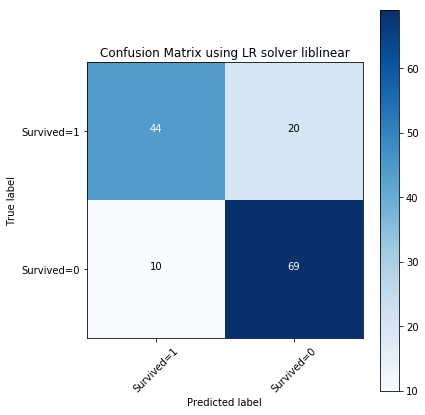

In [105]:
#plot confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Survived=0'], normalize=False, title='Confusion Matrix using LR solver liblinear')

In [106]:
#print a classification report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        79
           1       0.81      0.69      0.75        64

   micro avg       0.79      0.79      0.79       143
   macro avg       0.80      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



##### Evaluation with Log_Loss

##### *the smaller the value of Log_Loss  (0-1) the better the accuracy

In [107]:
from sklearn.metrics import log_loss

In [108]:
round(log_loss(y_test,yhat_prob),2)

0.52

#### 1b. LR model with solver = lbfgs

In [109]:
LR2 = LogisticRegression(C=0.01, solver = 'lbfgs').fit(X_train, y_train)

In [110]:
yhat2 = LR2.predict(X_test)
yhat2

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [111]:
#predict_proba returns estimates for all classes
yhat_prob2 = LR2.predict_proba(X_test)
yhat_prob2

array([[0.83, 0.17],
       [0.24, 0.76],
       [0.51, 0.49],
       [0.55, 0.45],
       [0.7 , 0.3 ],
       [0.27, 0.73],
       [0.79, 0.21],
       [0.78, 0.22],
       [0.66, 0.34],
       [0.51, 0.49],
       [0.55, 0.45],
       [0.5 , 0.5 ],
       [0.59, 0.41],
       [0.76, 0.24],
       [0.74, 0.26],
       [0.71, 0.29],
       [0.45, 0.55],
       [0.47, 0.53],
       [0.73, 0.27],
       [0.79, 0.21],
       [0.26, 0.74],
       [0.78, 0.22],
       [0.63, 0.37],
       [0.65, 0.35],
       [0.69, 0.31],
       [0.74, 0.26],
       [0.34, 0.66],
       [0.79, 0.21],
       [0.75, 0.25],
       [0.66, 0.34],
       [0.4 , 0.6 ],
       [0.34, 0.66],
       [0.78, 0.22],
       [0.78, 0.22],
       [0.65, 0.35],
       [0.76, 0.24],
       [0.23, 0.77],
       [0.78, 0.22],
       [0.42, 0.58],
       [0.82, 0.18],
       [0.8 , 0.2 ],
       [0.7 , 0.3 ],
       [0.45, 0.55],
       [0.58, 0.42],
       [0.67, 0.33],
       [0.26, 0.74],
       [0.77, 0.23],
       [0.23,

##### Evaluation with Jaccard index

In [112]:
round(jaccard_similarity_score(y_test, yhat2),2)

0.76

##### Evaluation with Confusion Matrix

In [113]:
def plot_confusion_matrix2(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2
    for i,j, in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center', color='white' if cm[i,j]>thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print(confusion_matrix(y_test, yhat2, labels = [1,0]))

[[36 28]
 [ 7 72]]


In [114]:
#compute confusion matrix
cnf_matrix2 = confusion_matrix(y_test, yhat2, labels=[1,0])
np.set_printoptions(precision=2)

Confusion Matrix without normalization
[[36 28]
 [ 7 72]]


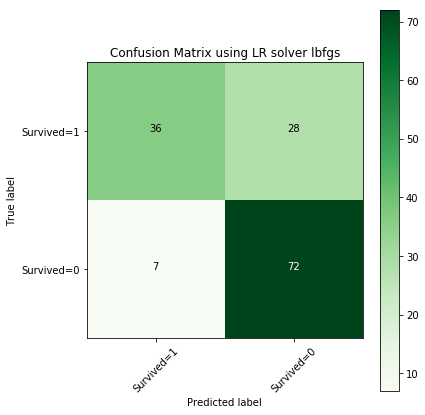

In [115]:
#plot confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix2(cnf_matrix2, classes=['Survived=1','Survived=0'], normalize=False, title='Confusion Matrix using LR solver lbfgs')

In [116]:
#print a classification report
print(classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80        79
           1       0.84      0.56      0.67        64

   micro avg       0.76      0.76      0.76       143
   macro avg       0.78      0.74      0.74       143
weighted avg       0.77      0.76      0.75       143



##### Evaluation with Log_Loss

In [117]:
round(log_loss(y_test,yhat_prob2),2)

0.52

### Model 2: K-nearest Neighbor (KNN)

In [118]:
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [119]:
#define X and y
X = X
y = y

In [120]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#### calculate accuracy of KNN for different k's

In [121]:
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range (1, Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat3 = neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat3)
    std_acc[n-1]=np.std(yhat3==y_test)/np.sqrt(yhat3.shape[0])

print('The mean accuracy for the Ks are:',mean_acc)

The mean accuracy for the Ks are: [0.74 0.73 0.78 0.77 0.79 0.8  0.82 0.8  0.8 ]


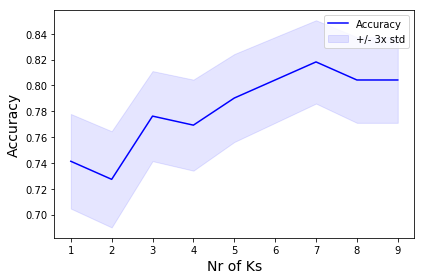

In [122]:
#plot the accuracy of different K's with +/- 3x std
plt.figure(figsize=(6,4))
plt.plot(range(1,Ks),mean_acc, color='blue')
plt.fill_between(range(1,Ks), mean_acc-1*std_acc, mean_acc+1*std_acc, alpha=0.10, color='blue')

plt.legend(('Accuracy','+/- 3x std'))
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Nr of Ks', fontsize=14)
plt.tight_layout()
plt.show()

In [123]:
print('The best accuracy is with', round(mean_acc.max(),2),'with k =', mean_acc.argmax()+1)

The best accuracy is with 0.82 with k = 7


##### Train the model with the optimal k, and predict

In [124]:
k=7
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [125]:
yhat3 = neigh.predict(X_test)
yhat3

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [126]:
print('Train set accuracy:',metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set accuracy:',metrics.accuracy_score(y_test, yhat3))

Train set accuracy: 0.8423817863397548
Test set accuracy: 0.8181818181818182


### Model 2: Decision Tree

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
X = X
y = y

In [129]:
Titanic_Tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [130]:
Titanic_Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [131]:
pred_Titanic_Tree = Titanic_Tree.predict(X_test)

In [132]:
print('Decision Tree accuracy is:',metrics.accuracy_score(y_test, pred_Titanic_Tree))

Decision Tree accuracy is: 0.7972027972027972


In [133]:
#visualization of tree
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [134]:
#!conda install -c conda-forge pydotplus --yes

In [135]:
#import pydotplus

In [136]:
TrT.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22,1,0,2
1,1,1,0,38,1,0,0


In [137]:
# dot_data = StringIO()
# filename = 'Titanic_Tree.png'
# featureNames = TrT_logreg.columns[1:7]
# targetNames = TrT_logreg['Survived'].unique().tolist()
# out = tree.export_graphviz(Titanic_Tree, feature_names=featureNames, out_file=dot_data, class_names=np.unique(y_train), special_characters=True,filled=True, rotate=False)

# graph = pydotplus.graph_from_dot_data(dot_data.get_value())
# graph.write_png(filename)
# img = mpimg.imread(filename)
# plt.figure(figsize=(100,200))
# plt.imshow(img, interpolation='nearest')

### Model 3a: Super Vector Machine (SVM) - kernel = rbf (radial basis function)

In [138]:
from sklearn import svm

In [139]:
X = X
y = y

In [140]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [141]:
yhat4 = clf.predict(X_test)
yhat4

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

##### Evaluation using Confusion Matrix

In [142]:
def plot_confusion_matrix3(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.PuRd):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2
    for i,j, in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center', color='white' if cm[i,j]>thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print(confusion_matrix(y_test, yhat4, labels = [1,0]))

[[42 22]
 [ 3 76]]


In [143]:
#compute confusion matrix
cnf_matrix3 = confusion_matrix(y_test, yhat4, labels=[1,0])
np.set_printoptions(precision=2)

Confusion Matrix without normalization
[[42 22]
 [ 3 76]]


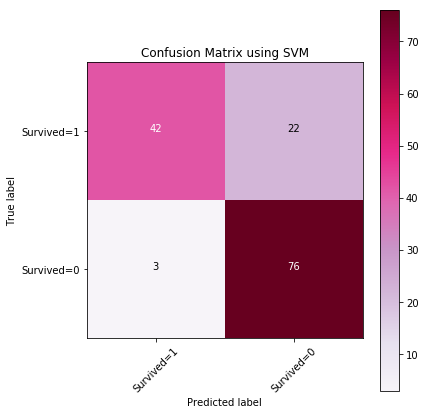

In [144]:
#plot confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix3(cnf_matrix3, classes=['Survived=1','Survived=0'], normalize=False, title='Confusion Matrix using SVM')

In [145]:
#print a classification report
print(classification_report(y_test, yhat4))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        79
           1       0.93      0.66      0.77        64

   micro avg       0.83      0.83      0.83       143
   macro avg       0.85      0.81      0.81       143
weighted avg       0.85      0.83      0.82       143



##### Evaluation using Jaccard index

In [146]:
round(jaccard_similarity_score(y_test, yhat4),2)

0.83

### Model 3b: Super Vector Machine (SVM) - kernel = linear

In [147]:
clf2 = svm.SVC(kernel='linear')

In [148]:
clf2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [149]:
yhat5 = clf2.predict(X_test)
yhat5

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [150]:
#print a classification report
print(classification_report(y_test, yhat5))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        79
           1       0.80      0.67      0.73        64

   micro avg       0.78      0.78      0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.77       143



In [151]:
round(jaccard_similarity_score(y_test, yhat5),2)

0.78

### Model 3c: Super Vector Machine (SVM) - kernel = polynomial

In [152]:
clf3 = svm.SVC(kernel='poly')

In [153]:
clf3.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [154]:
yhat6 = clf3.predict(X_test)
yhat6

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [155]:
#print a classification report
print(classification_report(y_test, yhat6))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        79
           1       0.80      0.56      0.66        64

   micro avg       0.74      0.74      0.74       143
   macro avg       0.76      0.72      0.73       143
weighted avg       0.75      0.74      0.73       143



In [156]:
round(jaccard_similarity_score(y_test, yhat6),2)

0.74

### Accuracy scores overview

In [157]:
from sklearn.metrics import f1_score

In [158]:
print('AVG weighted F1 score for the different models:')
print('')
print('LogRegression with liblinear solver:',round(f1_score(y_test, yhat, average='weighted'),2))
print('LogRegression with lbfgs solver:',round(f1_score(y_test, yhat2, average='weighted'),2))
print('KNN (with optimal k =7):',round(f1_score(y_test, yhat3, average='weighted'),2))
print('SVM with rbf-kernel:',round(f1_score(y_test, yhat4, average='weighted'),2))
print('SVM with linear-kernel:',round(f1_score(y_test, yhat5, average='weighted'),2))
print('SVM with polynomial-kernel:',round(f1_score(y_test, yhat6, average='weighted'),2))

AVG weighted F1 score for the different models:

LogRegression with liblinear solver: 0.79
LogRegression with lbfgs solver: 0.75
KNN (with optimal k =7): 0.81
SVM with rbf-kernel: 0.82
SVM with linear-kernel: 0.77
SVM with polynomial-kernel: 0.73


In [159]:
print('Jaccard index for the different models:')
print('')
print('LogRegression with liblinear solver:',round(jaccard_similarity_score(y_test, yhat),2))
print('LogRegression with lbfgs solver:',round(jaccard_similarity_score(y_test, yhat2),2))
print('KNN (with optimal k =7):',round(jaccard_similarity_score(y_test, yhat3),2))
print('SVM with rbf-kernel:',round(jaccard_similarity_score(y_test, yhat4),2))
print('SVM with linear-kernel:',round(jaccard_similarity_score(y_test, yhat5),2))
print('SVM with polynomial-kernel:',round(jaccard_similarity_score(y_test, yhat6),2))

Jaccard index for the different models:

LogRegression with liblinear solver: 0.79
LogRegression with lbfgs solver: 0.76
KNN (with optimal k =7): 0.82
SVM with rbf-kernel: 0.83
SVM with linear-kernel: 0.78
SVM with polynomial-kernel: 0.74


In [160]:
print('Decision Tree accuracy is:',metrics.accuracy_score(y_test, pred_Titanic_Tree))

Decision Tree accuracy is: 0.7972027972027972


### At this point the SVM model with rbf-kernel returns the highest accuracy

_____________________________________________

## Use SVM(rbf) model to predict survival on the test_set/Test_Titanic

##### pre-process Test Set further to use in predictions for submission

In [161]:
#column 'Age' needs to be of type 'int'
Test_Titanic['Age'] = Test_Titanic['Age'].astype('int')
Test_Titanic.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,S


In [162]:
TeT = Test_Titanic[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Embarked']]
TeT.head(4)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34,0,0,Q
1,893,3,female,47,1,0,S
2,894,2,male,62,0,0,Q
3,895,3,male,27,0,0,S


In [163]:
#define a label encoder to turn the categorical variables in column 'Sex' into numerical variables 
label_encoder3 = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Sex'. 
TeT['Sex']= label_encoder3.fit_transform(TeT['Sex']) 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [164]:
#define a label encoder to turn the categorical variables in column 'Embarked' into numerical variables 
label_encoder4 = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Embarked'. 
TeT['Embarked']= label_encoder4.fit_transform(TeT['Embarked'])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [165]:
TeT.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34,0,0,1
1,893,3,0,47,1,0,2
2,894,2,1,62,0,0,1
3,895,3,1,27,0,0,2
4,896,3,0,22,1,1,2


In [166]:
features = ['Pclass','Sex','Age','SibSp','Parch','Embarked']

In [167]:
#define X and y
X = pd.get_dummies(TrT[features])
y = TrT['Survived']

X_train = X
y_train = y
X_test = pd.get_dummies(TeT[features])

In [168]:
#normalize dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [169]:
clf_predict = svm.SVC(kernel='rbf')
clf_predict.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [170]:
predictions_SVM = clf_predict.predict(X_test)
predictions_SVM

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [171]:
output = pd.DataFrame({'PassengerId': Test_Titanic.PassengerId, 'Survived': predictions_SVM})
output.to_csv('SVM_prediction.csv', index=False)
print('SVM_prediction.csv successfully saved')

SVM_prediction.csv successfully saved


In [172]:
SVM_prediction_df = pd.read_csv('SVM_prediction.csv')
SVM_prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [173]:
#distribution of survivors/non-survivors with SVM model
SVM_df = pd.DataFrame(SVM_prediction_df['Survived'].value_counts())
SVM_df

,Survived
0,259
1,159


## Prediction submitted - accuracy score ~0.72

------------------------------------------------------

## Use KNN model to predict survival on the test_set/Test_Titanic

In [174]:
k=7
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [175]:
predictionsKNN = neigh.predict(X_test)
predictionsKNN

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [176]:
output = pd.DataFrame({'PassengerId': Test_Titanic.PassengerId, 'Survived': predictionsKNN})
output.to_csv('KNN_prediction.csv', index=False)
print('KNN_prediction.csv successfully saved')

KNN_prediction.csv successfully saved


In [177]:
KNN_prediction_df = pd.read_csv('KNN_prediction.csv')
KNN_prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [178]:
#distribution survivors/non-survivors with KNN model
KNN_df = pd.DataFrame(KNN_prediction_df['Survived'].value_counts())
KNN_df

,Survived
0,287
1,131


## Prediction submitted - accuracy score ~0.68

--------------------------------------------------------------------------

## Use Decision Tree model to predict survival on the test_set/Test_Titanic

In [179]:
Titanic_Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [180]:
pred_Titanic_Tree = Titanic_Tree.predict(X_test)
pred_Titanic_Tree

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [181]:
output = pd.DataFrame({'PassengerId': Test_Titanic.PassengerId, 'Survived': pred_Titanic_Tree})
output.to_csv('DT_prediction.csv', index=False)
print('DT_prediction.csv successfully saved')

DT_prediction.csv successfully saved


In [182]:
DT_prediction_df = pd.read_csv('DT_prediction.csv')
DT_prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [183]:
#distribution survivors/non-survivors with Decision Tree model
DT_df = pd.DataFrame(DT_prediction_df['Survived'].value_counts())
DT_df

,Survived
0,324
1,94


## Prediction submitted - accuracy score ~0.77

------------------------------------

## Use Decision Tree model to predict survival on the test_set/Test_Titanic

In [184]:
LogR = LogisticRegression(C=0.01, solver = 'liblinear').fit(X_train, y_train)

In [185]:
predictionsLogR = LogR.predict(X_test)
predictionsLogR

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [186]:
output = pd.DataFrame({'PassengerId': Test_Titanic.PassengerId, 'Survived': predictionsLogR})
output.to_csv('LogR_prediction.csv', index=False)
print('LogR_prediction.csv successfully saved')

LogR_prediction.csv successfully saved


In [187]:
LogR_prediction_df = pd.read_csv('LogR_prediction.csv')
LogR_prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [188]:
#distribution survivors/non-survivors with KNN model
LogR_df = pd.DataFrame(LogR_prediction_df['Survived'].value_counts())
LogR_df

,Survived
0,360
1,58


## Prediction submitted - accuracy score ~0.73

-----------------------------------------------------------------------------------